In [47]:
%%writefile kNN.py
import numpy as np

import operator

def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0.0,0.0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels 
'''
step:
    1. 计算样本点（单条记录）到已知数据集中每个点的距离
    2. 按照距离值排序
    3. 统计最近的k个点类别分布频次 类别：频次
    4. 返回出现频次最高的类别作为当前点的预测分类
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
'''


def classify0(inX, dataset, labels ,k ) :
    ## 获取数据集行数
    dataset_size = dataset.shape[0]
    ## 输入竖向复制datasize份，保证广播
    diffMat = np.tile(inX,(dataset_size,1)) - dataset
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distances = sqDistance**0.5
    ## 按距离排序，返回排序后index
    sortDistIndicies = distances.argsort()
    classCount = {}
    # 统计最近k个值的label分布
    for i in range(k) :
        voteLabel = labels[sortDistIndicies[i]]
        classCount[voteLabel]= classCount.get(voteLabel,0) + 1
    # 返回频率最高的label
    sortedClassCount = sorted(classCount.items(),key=lambda item:item[1] ,reverse=True)
    return sortedClassCount[0][0]
'''
加载训练集
'''
def file2matrix(filename):
    raw_np = np.loadtxt(filename,delimiter='\t')
    mat = raw_np[:,0:3]
    classVector = raw_np[:,-1]
    return mat , classVector
'''
归一化处理  (X-Xmin)/(Xmax-Xmin)
'''
def autoNorm(dataset):
    minVals = dataset.min()
    maxVals = dataset.max()
    ranges = maxVals - minVals
    normDataSet = (dataset-minVals)/(maxVals-minVals)
    
    return normDataSet,ranges,minVals
def datingClassTest() : 
    hoRatio = 0.1 
    
    datingDataMat,datingDataLabels = file2matrix('datingTestSet2.txt')
    normDataSet,ranges,minVals = autoNorm(datingDataMat)
    m = normDataSet.shape[0]
    numTestVecs = int(hoRatio*m)
    errorCount = 0.0
    for i in range(numTestVecs):
        result =  classify0(normDataSet[i,:], normDataSet[numTestVecs:m,:], datingDataLabels[numTestVecs:m] ,3 )
        print("class result : {0} ; real label : {1}".format( result , datingDataLabels[i]))
        if(result != datingDataLabels[i]) :
            errorCount+=1 
    print(numTestVecs,' ', errorCount)
    print("error rate : {0}".format(errorCount/float(numTestVecs)))

Overwriting kNN.py


In [6]:
import kNN
import matplotlib.pyplot as plt 

datingDataMat,datingDataLabels = kNN.file2matrix('datingTestSet2.txt')

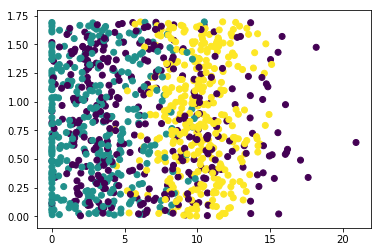

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],c=15*datingDataLabels)
plt.show()


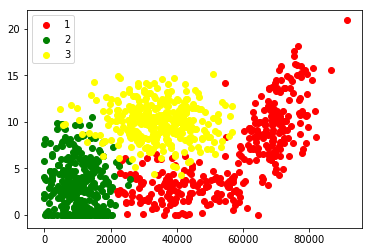

In [8]:
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []
for i in range(len(datingDataMat)) :
    if datingDataLabels[i]==1 :
        x1.append(datingDataMat[i,0])
        y1.append(datingDataMat[i,1])
    elif datingDataLabels[i]==2 : 
        x2.append(datingDataMat[i,0])
        y2.append(datingDataMat[i,1])
    else :
        x3.append(datingDataMat[i,0])
        y3.append(datingDataMat[i,1])
        
fig2 = plt.figure()
plt.scatter(x1,y1,c='r',label=1)
plt.scatter(x2,y2,c='green',label=2)
plt.scatter(x3,y3,c='yellow',label=3)
plt.legend()
plt.show()

In [48]:
from imp import reload 
reload(kNN)
kNN.datingClassTest()

class result : 3.0 ; real label : 3.0
class result : 2.0 ; real label : 2.0
class result : 3.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 3.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 3.0 ; real label : 3.0
class result : 3.0 ; real label : 3.0
class result : 1.0 ; real label : 1.0
class result : 3.0 ; real label : 3.0
class result : 3.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 2.0 ; real label : 2.0
class result : 1.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 3.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 1.0 ; real label : 1.0
class result : 2.0 ; real label : 2.0
class result : 1.0 ; real label : 3.0
class result : 2.0 ; real label : 2.0
class result : 1.0 ; real label : 1.0
class result : 1.0 ; real label : 2.0
class result : 3.0 ; real label : 3.0
class result : 2.0 ; real label : 2.0
class result : 3.0 ; real label : 3.0
class result